### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#Import custom util functions
from utils import plot_coupon_acceptance, plot_comparison,to_snake_case

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')
data2 = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
print(data.describe())
print(data.info())
print(data.shape)

#Count null values
null_counts = data2.isna().sum()
print(null_counts)

#Investigate each column with missing data
just_cars = data[data['car'].notnull()] #Just rows that have answered car data
just_cars.index = range(1, len(just_cars) + 1) #reset index to avoid confusion of actual length
# print(just_cars['car'])

null_only_data = data[data['Bar'].isnull()]
null_only_data.to_csv('data/null_only_data.csv', index=False)

data_no_car = data.drop(columns=['car'])
data_no_car_nulls = data_no_car[data_no_car.isna().any(axis=1)]
data_no_car_nulls.to_csv('data/data_no_car_nulls.csv', index=False)





        temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.000000        0.000000     

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:

# rename columns to lower snake case to be consistent.
columns_to_rename = {
    'Bar':'bar',
    'CoffeeHouse':'coffee_house',
    'CarryAway':'carry_away',
    'RestaurantLessThan20':'restaurant_less_than_20',
    'Restaurant20To50':'restaurant_20_to_50',
    'Y':'y',
    'passanger': 'passenger',
    'maritalStatus':'marital_status',
}

data.rename(columns=columns_to_rename, inplace=True)

#Car is almost completely null only 108 none null values, so it makes sense to drop the entire colunm
#I also chose to fill the remaining columns with 'unknown' because the collective counts are still valuable
#All of the nulls were related to frequency of visiting bar, restuarnts and coffee shops.
#I will filter out unknowns later if required.
data_filled = data.drop(columns=['car']).fillna('unknown')

# clean_data = data.drop(columns=['car']).dropna()
# null_counts = data_filled.isna().sum()
# print(null_counts)

#Tests to see how much the null values impact the frequency counts
bar_coupon_no_freq = data_filled[(data_filled['coupon']=='Bar') & (data_filled['bar']=='unknown')]
coffee_coupon_no_freq = data_filled[(data_filled['coupon']=='Coffee House') & (data_filled['coffee_house']=='unknown')]
# print(bar_coupon_no_freq,coffee_coupon_no_freq)



4. What proportion of the total observations chose to accept the coupon? 56.8% accepted



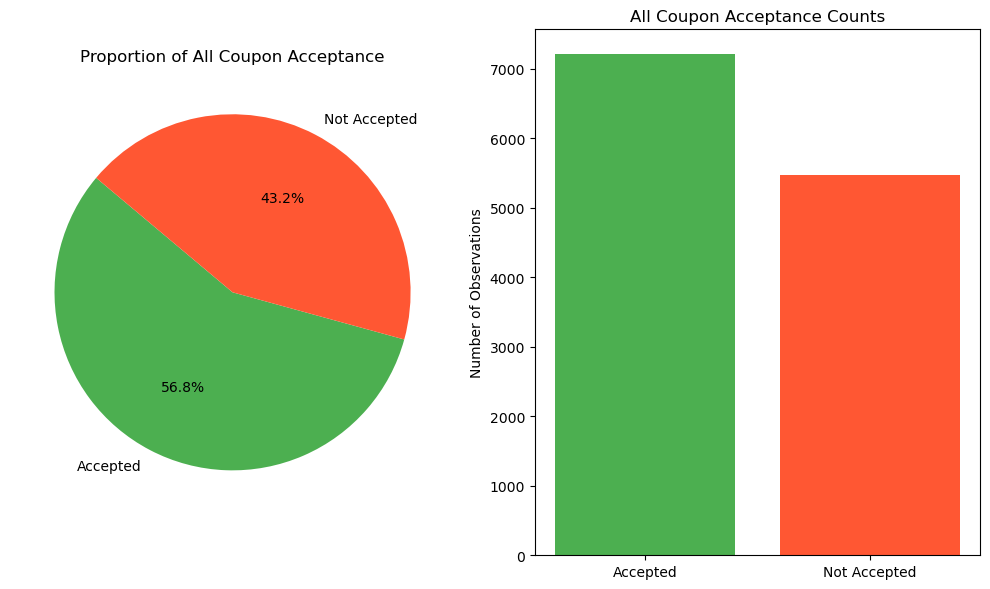

In [6]:

plot_coupon_acceptance(data, 'All')

5. Use a bar plot to visualize the `coupon` column.

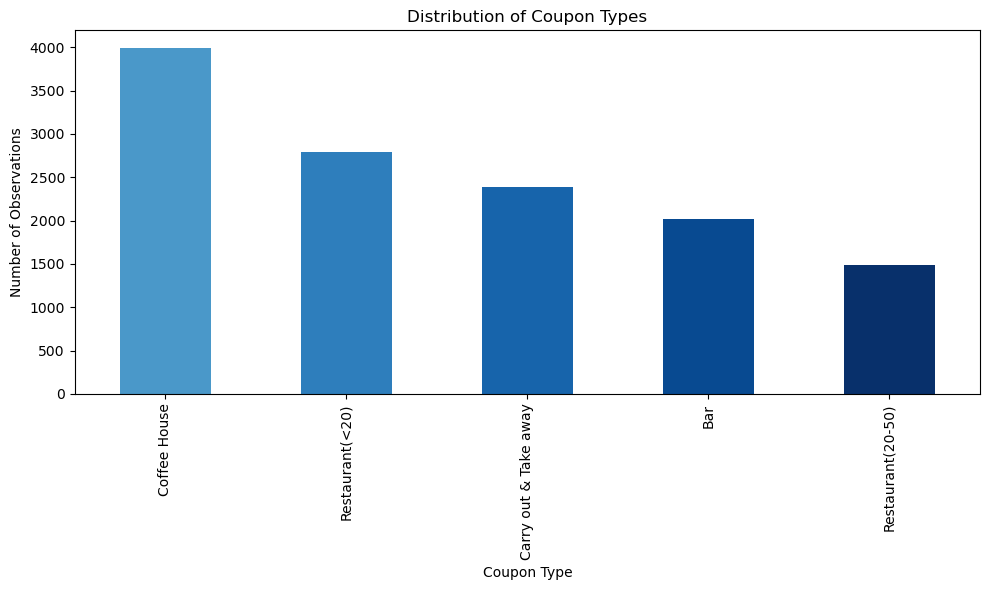

In [7]:
# Calculate the counts of each unique value in the 'coupon' column
coupon_counts = data['coupon'].value_counts()

# Generate a list of colors using the 'Blues' colormap
colors = plt.cm.Blues(np.linspace(0.6, 1, len(coupon_counts)))

# Plotting the bar chart
plt.figure(figsize=(10, 6))
coupon_counts.plot(kind='bar',  color=colors)
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Number of Observations')

# Save the plot to /images directory
plt.tight_layout()
plt.savefig('images/coupon_distribution.png')

# Show the plot
plt.show()

6. Use a histogram to visualize the temperature column.

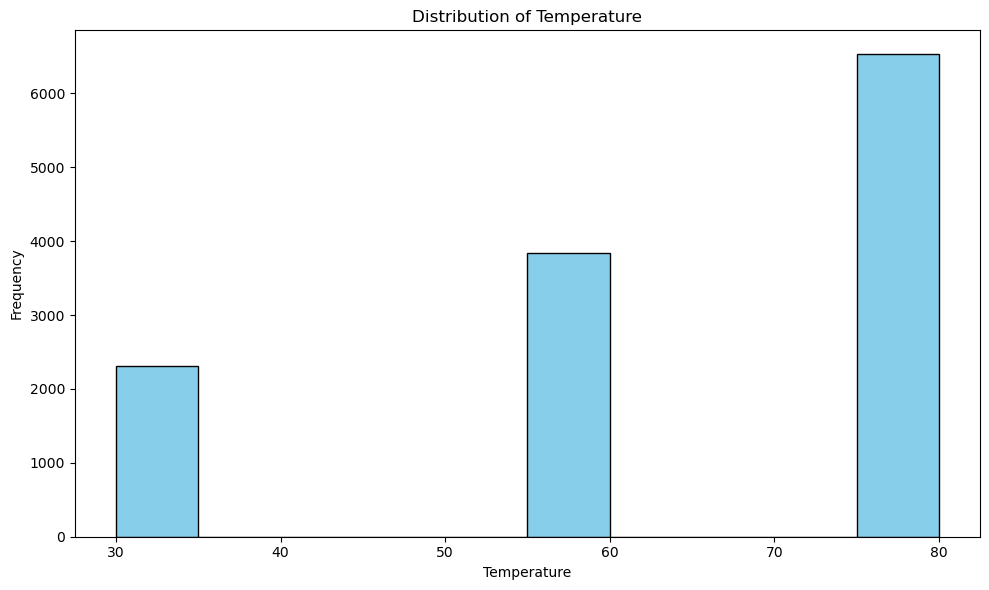

In [8]:

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(data['temperature'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')


# Save the plot to /images directory
plt.tight_layout()
plt.savefig('images/temperature_distribution.png')

# Show the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [9]:
bar_coupon_data = data_filled[data_filled['coupon']=='Bar']
bar_coupon_data.head(5)

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,marital_status,...,coffee_house,carry_away,restaurant_less_than_20,restaurant_20_to_50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


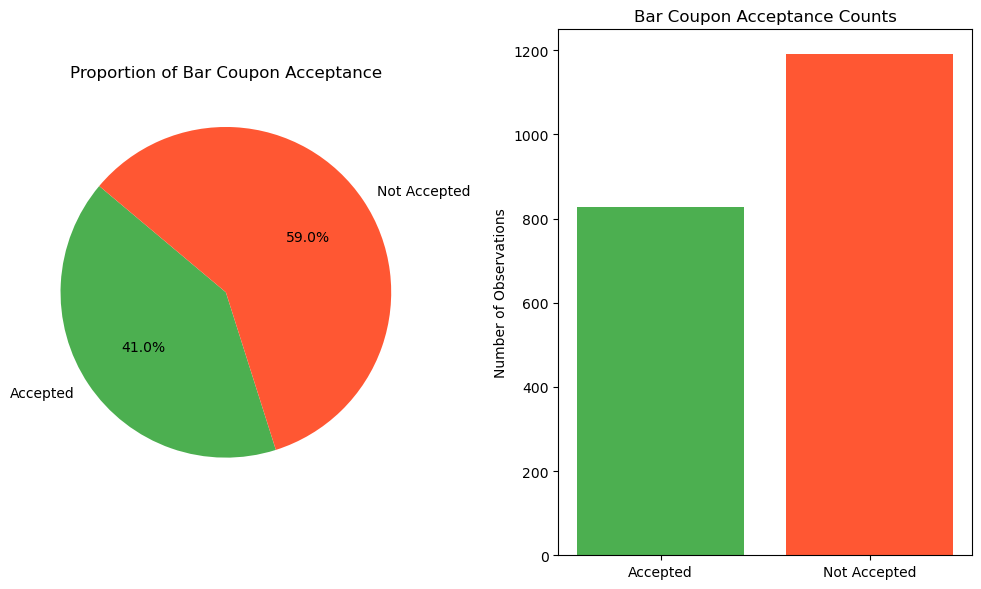

In [10]:
# print(bar_coupon_data)
plot_coupon_acceptance(bar_coupon_data, 'Bar')


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


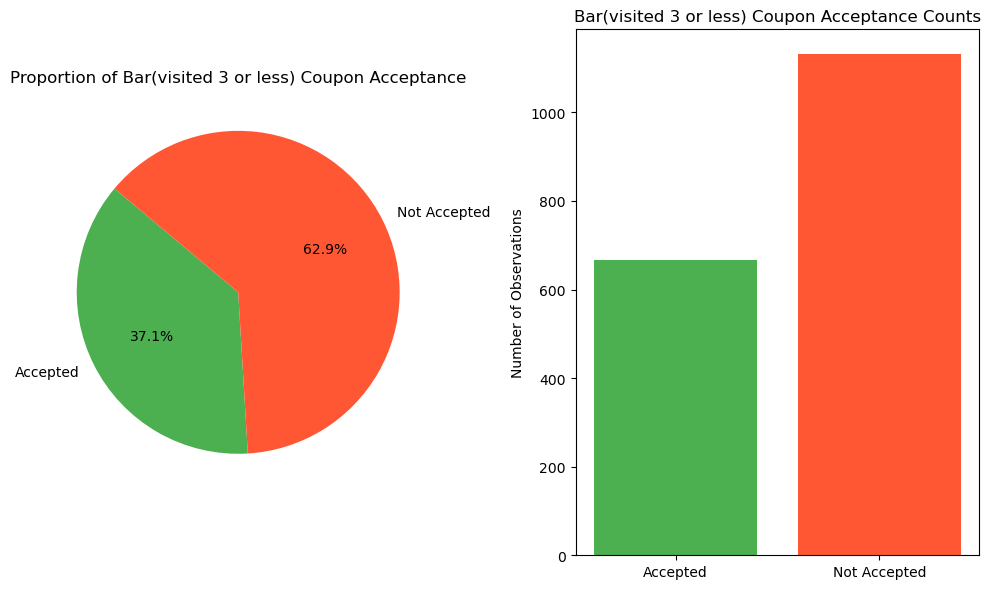

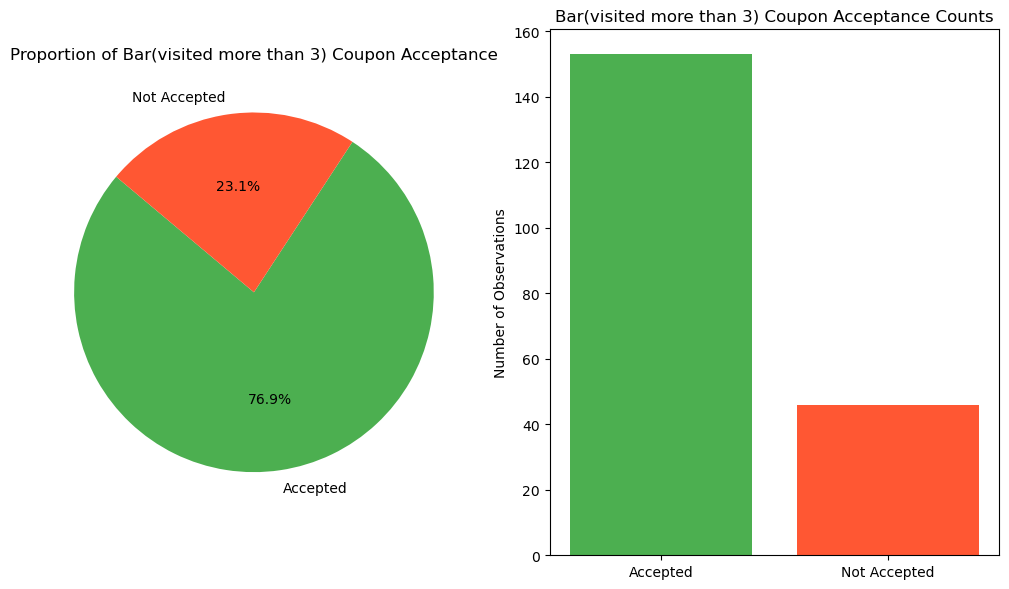

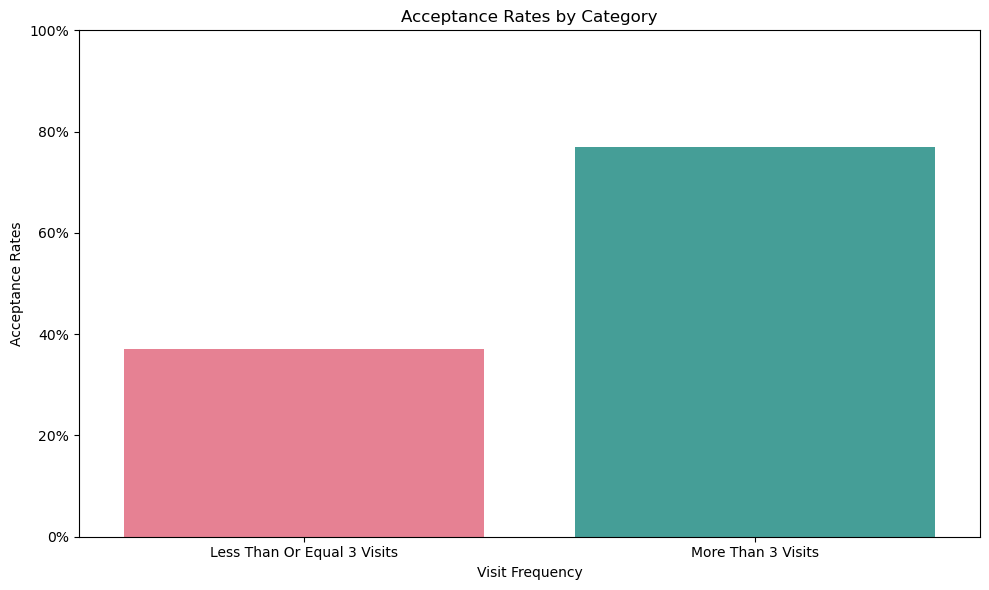

In [11]:
#Remove Null rows as the following results actually depend on frequency of visits and without knowing
# the unkown values may impact the outcomes
bar_coupon_data = bar_coupon_data.dropna();
# Filter the DataFrame based on the frequency of bar visits ( note unknown is ignored )
lte3_bar_visits = bar_coupon_data[bar_coupon_data['bar'].isin(['never', 'less1', '1~3'])] #includes 1-3, less1 and never
gt3_bar_visits = bar_coupon_data[bar_coupon_data['bar'].isin(['gt8', '4~8'])] #includes gt8 and 4-8

plot_coupon_acceptance(lte3_bar_visits, 'Bar(visited 3 or less)')
plot_coupon_acceptance(gt3_bar_visits, 'Bar(visited more than 3)')

plot_comparison( 
        ['Less Than Or Equal 3 Visits', 'More Than 3 Visits'], 
        [lte3_bar_visits, gt3_bar_visits],
        'Acceptance Rates by Category',
        'Visit Frequency',
        'Acceptance Rates',
)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


['never' 'less1' '1~3' 'gt8' nan '4~8'] ['21' '46' '26' '31' '41' '50plus' '36' 'below21']


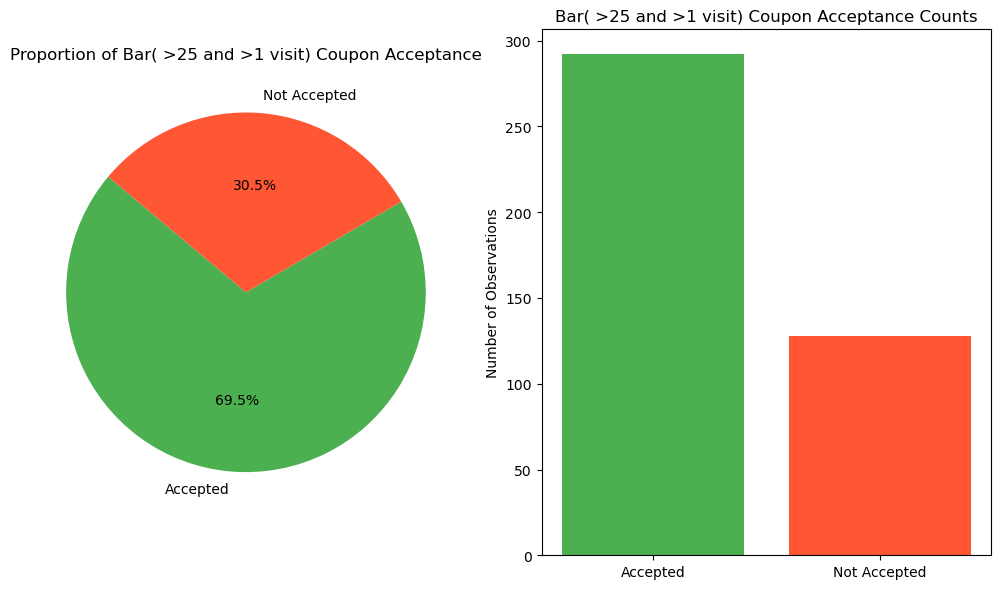

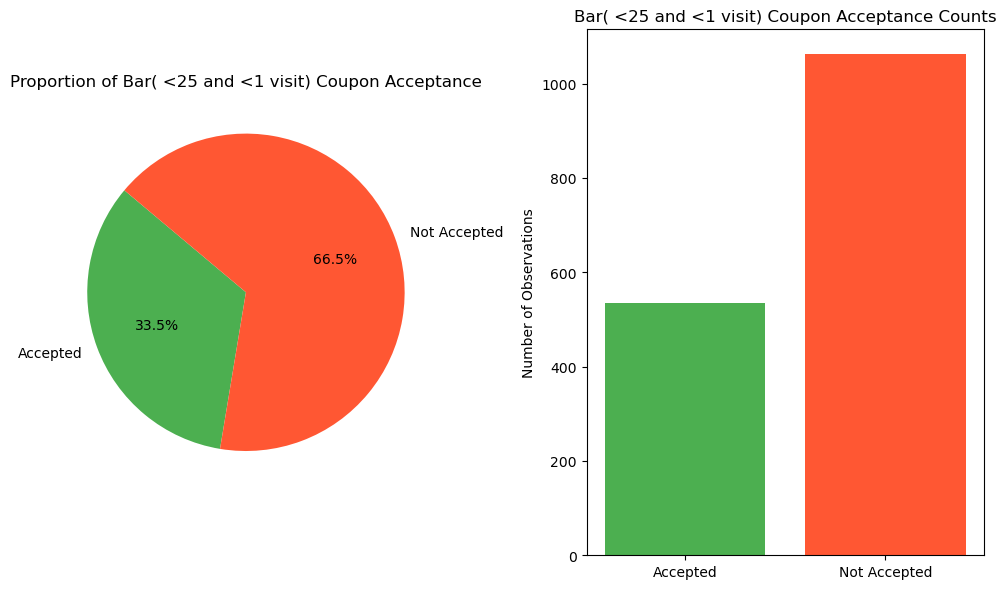

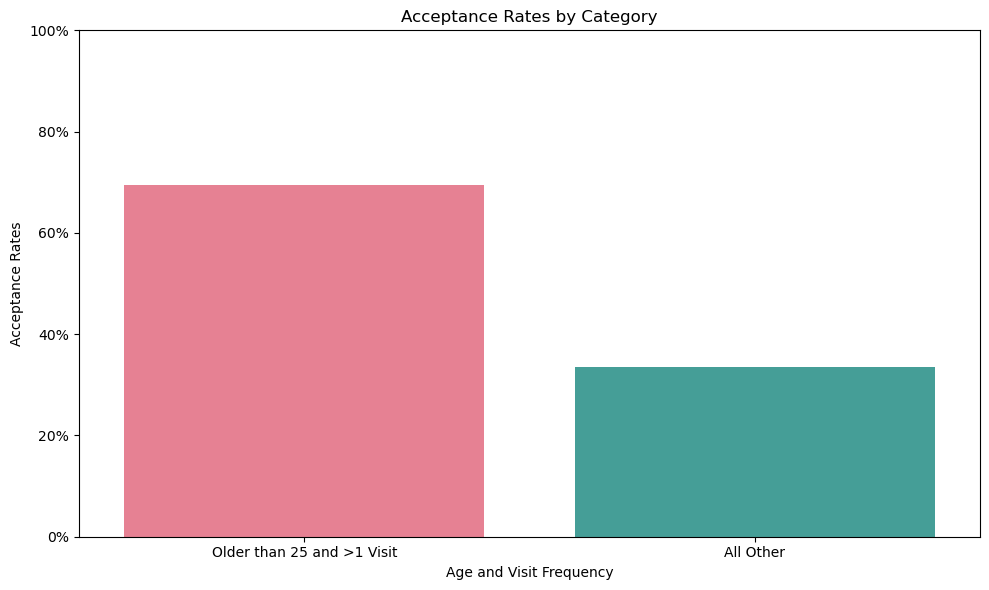

In [12]:
#NOTE: This question can not be answered accurately because of the grouping of data. We have access to
# to Bar which is not a number, but a string that represents a range of number of visits. Since there is 
# no range that represents 1, I will compare 1 or more. It should also be noted that the data does not
# state the acutal unit, or time frame. Assuming that 'Bar' is visits per month
# Filter the DataFrame based on the frequency of bar visits ( note unknown is ignored )

#Get all the distinct values for Age and Bar
distinct_bar_values = data['bar'].unique()
distinct_age_values = data['age'].unique()
print(distinct_bar_values, distinct_age_values)

#Plots the comparison of drivers who go to a bar more than once a month and are over the age of 25 to the all others
# coupon_data: Dataframe with the data filtered by coupon type
# type: type of coupon (Bar | Coffee)
# col: the corresponding acceptance rate column for the coupon type. (bar | coffee_house)
def plot_over_25_comparison(coupon_data, type, col):

    #filter datasets
    more_than_once_a_month_values = [ '1~3', 'gt8', '4~8'] 
    less_than_25_values = ['21','below21']
    gt_25_age_and_visits_gt_1 = coupon_data[((coupon_data[f'{col}'].isin(more_than_once_a_month_values))&(~coupon_data['age'].isin(less_than_25_values)))] 
    all_other = coupon_data[~((coupon_data[f'{col}'].isin(more_than_once_a_month_values))&(~coupon_data['age'].isin(less_than_25_values)))] 

    #verify data filtering
    # print(gt_25_age_and_visits_gt_1.shape)
    # print(all_other.shape)

    #plot data
    plot_coupon_acceptance(gt_25_age_and_visits_gt_1, f'{type}( >25 and >1 visit)')
    plot_coupon_acceptance(all_other, f'{type}( <25 and <1 visit)')
    plot_comparison(
        ['Older than 25 and >1 Visit', 'All Other'], 
        [gt_25_age_and_visits_gt_1, all_other],
        'Acceptance Rates by Category',
        'Age and Visit Frequency',
        'Acceptance Rates',
    )

    # gt_25_age_and_visits_gt_1_rates = calculate_acceptance_rates(lte3_bar_visits)
    # all_other_rates = calculate_acceptance_rates(gt3_bar_visits)
plot_over_25_comparison(bar_coupon_data, 'Bar', 'bar')


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


['Alone' 'Friend(s)' 'Kid(s)' 'Partner']


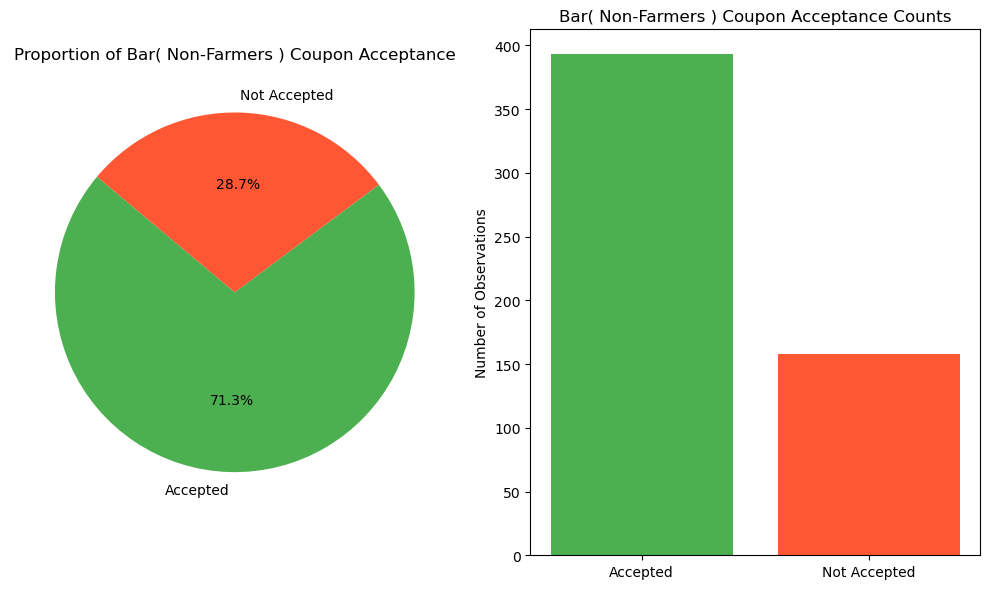

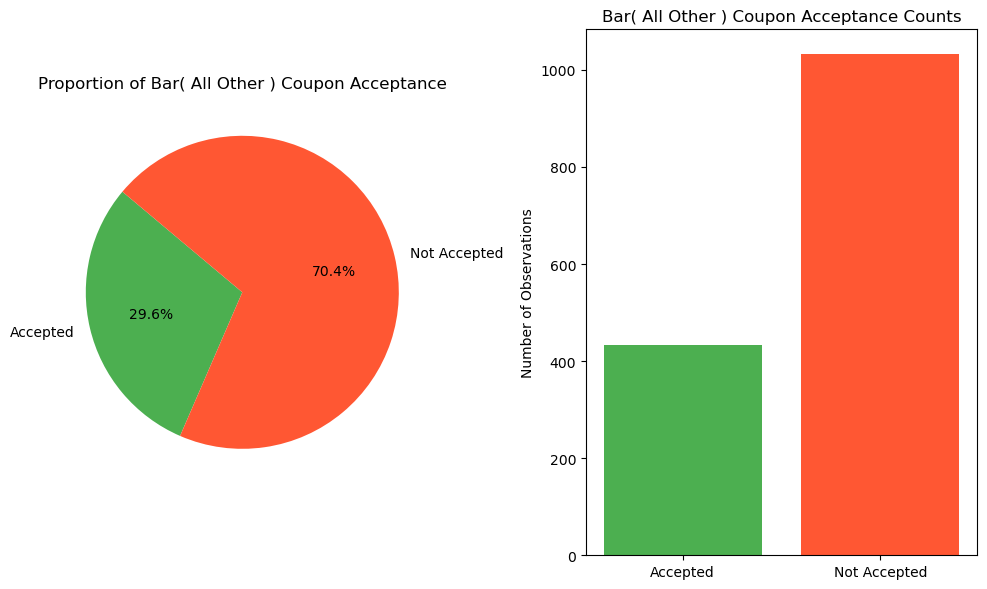

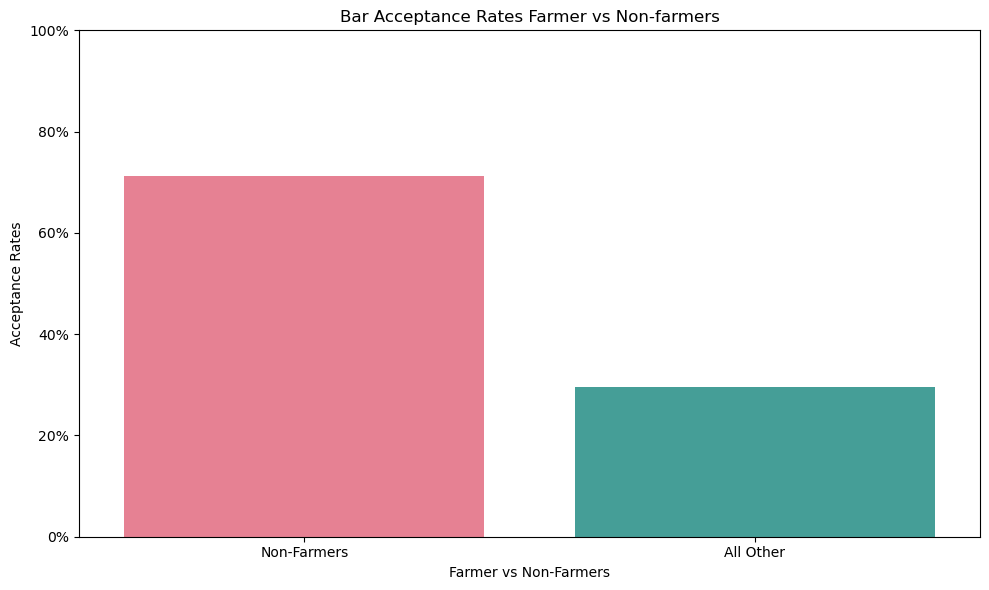

In [13]:
distinct_occupations_values = data['occupation'].unique()
distinct_passanger_values = data['passenger'].unique()

print(distinct_passanger_values)

def plot_no_kid_or_farmer_comparison(coupon_data, type, col):
    #filter datasets
    more_than_once_a_month_values = [ '1~3', 'gt8', '4~8'] 
    less_than_25_values = ['21','below21']
    occupation = ['Farming Fishing & Forestry']
    passenger = ['Kid(s)']
    non_farmers = coupon_data[(
        (
            coupon_data[f'{col}'].isin(more_than_once_a_month_values)
        )&(
            ~coupon_data['occupation'].isin(occupation)
        )&(
            ~coupon_data['passenger'].isin(passenger)

        )
    )] 
    all_other = coupon_data[~(
        (
            coupon_data[f'{col}'].isin(more_than_once_a_month_values)
        )&(
            ~coupon_data['occupation'].isin(occupation)
        )&(
            ~coupon_data['passenger'].isin(passenger)

        )
    )] 

    #plot data
    plot_coupon_acceptance(non_farmers, f'{type}( Non-Farmers )')
    plot_coupon_acceptance(all_other, f'{type}( All Other )')
    plot_comparison(
        ['Non-Farmers', 'Farmers'], 
        [non_farmers, all_other],
        f'{type} Acceptance Rates Farmer vs Non-farmers',
        'Farmer vs Non-Farmers',
        'Acceptance Rates',
    )

plot_no_kid_or_farmer_comparison(bar_coupon_data, 'Bar', 'bar')

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



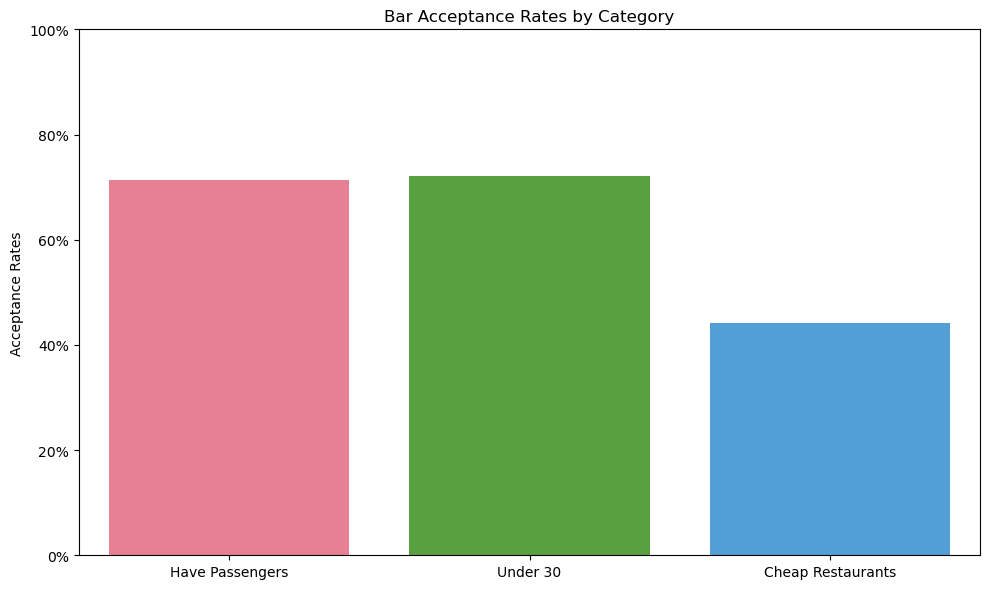

In [14]:

distinct_marital_status_values = data['marital_status'].unique()
distinct_restaurant_20_values = data['restaurant_less_than_20'].unique()
distinct_income_values = data['income'].unique()

# print(distinct_marital_status_values, distinct_restaurant_20_values, distinct_income_values)

#filter datasets
more_than_once_a_month_values = [ '1~3', 'gt8', '4~8'] 
under_30_values = ['21','below21','26']
occupation = ['Farming Fishing & Forestry']
passenger = ['Kid(s)']
restaurants =['4~8','gt8']
income = ['$25000 - $37499', 'Less than $12500']

have_passengers_query_string = (
    '`bar` in @more_than_once_a_month_values and '
    '`passenger` != "Kid(s)" and '
    '`marital_status` != "Widowed"'
)
have_passengers = bar_coupon_data.query(have_passengers_query_string)

under_30_query_string = (
    '`bar` in @more_than_once_a_month_values and '
    '`age` in @under_30_values '
)
under_30 = bar_coupon_data.query(under_30_query_string)

cheap_restaurants_query_string = (
    '`restaurant_less_than_20` in @restaurants and'
    '`income` in @income '  
)
cheap_restaurants = bar_coupon_data.query(cheap_restaurants_query_string)


plot_comparison(
    ['Have Passengers', 'Under 30', 'Cheap Restaurants'], 
    [have_passengers,under_30, cheap_restaurants],
    'Bar Acceptance Rates by Category',
    '',
    'Acceptance Rates',
)

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

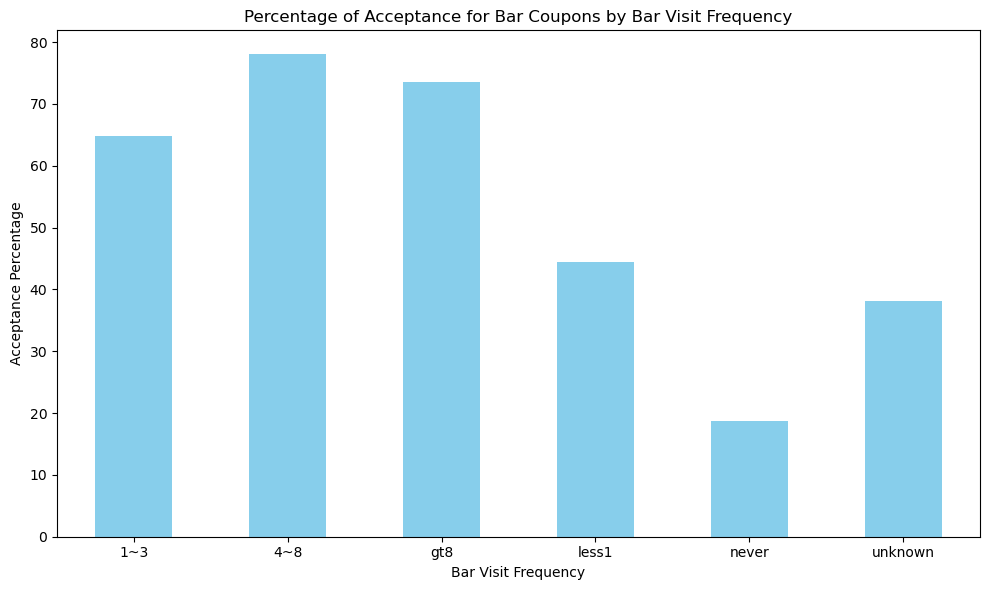

In [15]:
#Plot acceptance by bar visit frequency
acceptance_rates = bar_coupon_data.groupby('bar')['y'].mean() * 100
title = 'Percentage of Acceptance for Bar Coupons by Bar Visit Frequency'
plt.figure(figsize=(10, 6))
acceptance_rates.plot(kind='bar', color='skyblue')
plt.title(title)
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Acceptance Percentage')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(f'images/{to_snake_case(title)}.png')
plt.show()


#### Accepted Bar Coupon Hypothesis ####
Drivers that frequent bars more often, are more likely to accept a coupon for a bar. Also - farmers are less likely to accept coupons, I wonder if they are also less likely to frequent bars. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#### Analysis: The Relationship Between Coffee House Coupons

In this section I will try to determine which characteristic most heavily impact acceptances rates for Coffee House Coupons

1. Create a new `DataFrame` that contains just the Coffee House Coupons.

In [16]:
coffee_coupon_data = data_filled[data_filled['coupon'] == 'Coffee House']
coffee_coupon_data.head(5)

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,marital_status,...,coffee_house,carry_away,restaurant_less_than_20,restaurant_20_to_50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,0,0,0,1,0


2. What proportion of bar coupons were accepted?

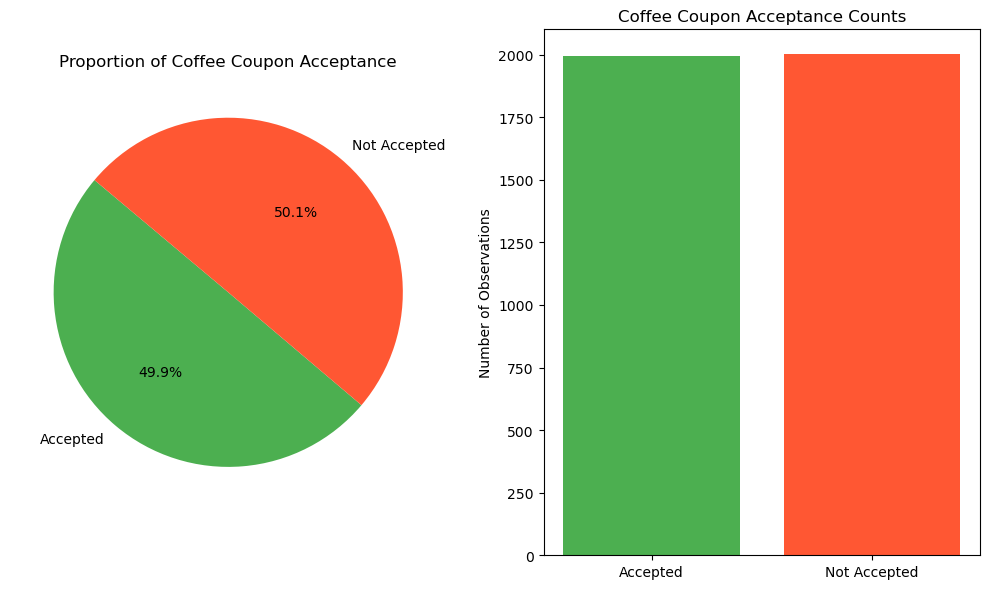

In [17]:
plot_coupon_acceptance(coffee_coupon_data, 'Coffee')

3. Compare the acceptance rate between those who went to a coffee shop 3 or fewer times a month to those who went more.

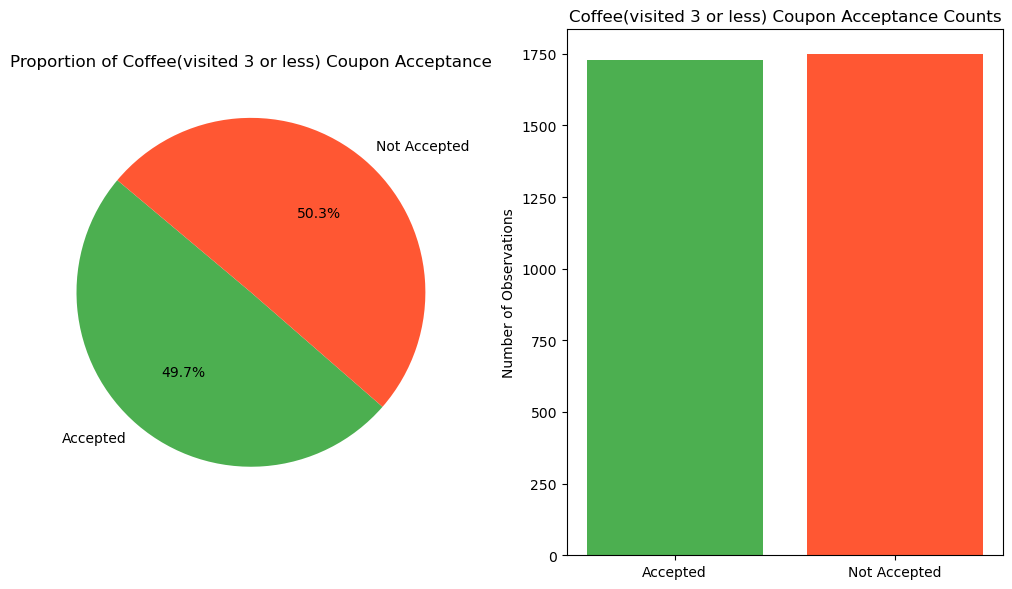

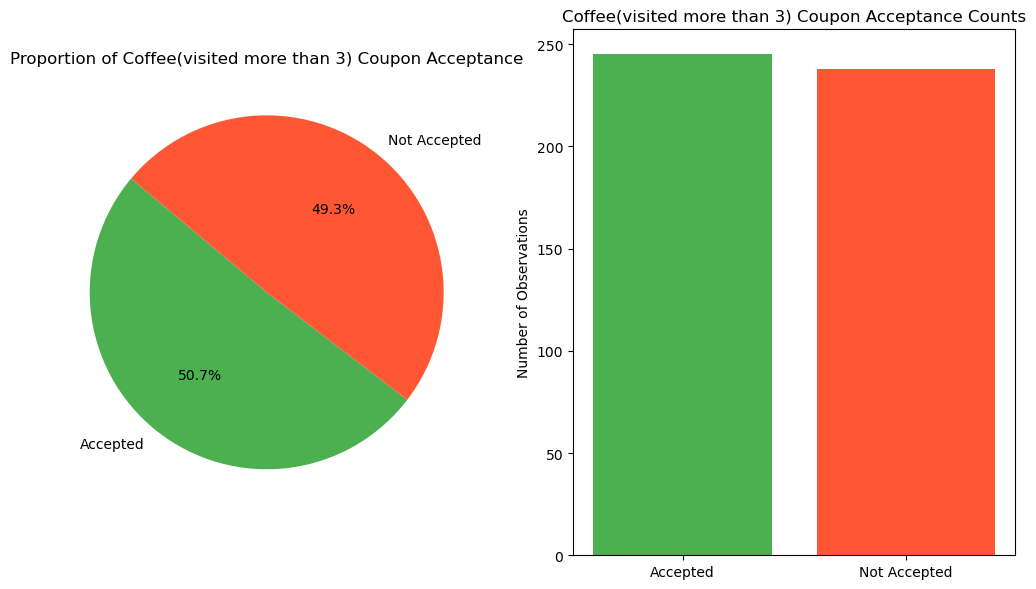

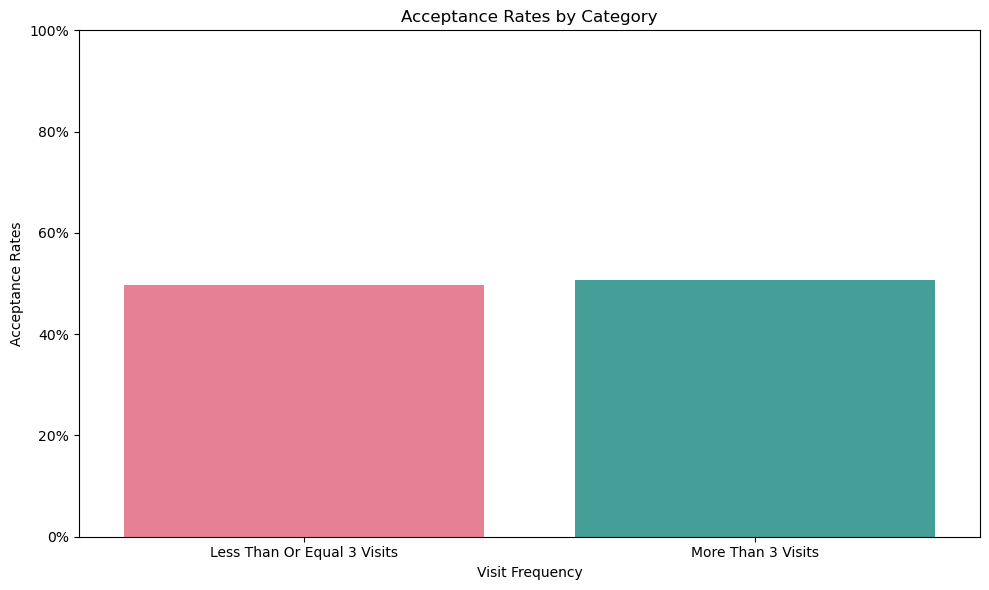

In [18]:
#Remove  rows with nulls as the following results actually depend on frequency of visits and without knowing
# the unkown values may impact the outcomes
coffee_coupon_data = coffee_coupon_data.dropna();

# Filter the DataFrame based on the frequency of coffee shop visits ( note unknown is ignored )
lte3_coffee_visits = coffee_coupon_data[coffee_coupon_data['bar'].isin(['never', 'less1', '1~3'])] #includes 1-3, less1 and never
gt3_coffee_visits = coffee_coupon_data[coffee_coupon_data['bar'].isin(['gt8', '4~8'])] #includes gt8 and 4-8

plot_coupon_acceptance(lte3_coffee_visits, 'Coffee(visited 3 or less)')
plot_coupon_acceptance(gt3_coffee_visits, 'Coffee(visited more than 3)')

plot_comparison( 
        ['Less Than Or Equal 3 Visits', 'More Than 3 Visits'], 
        [lte3_coffee_visits, gt3_coffee_visits],
        'Acceptance Rates by Category',
        'Visit Frequency',
        'Acceptance Rates',
)

4. Compare the acceptance rate between drivers who go to a coffee shop more than once a month and are over the age of 25 to the all others.  Is there a difference?


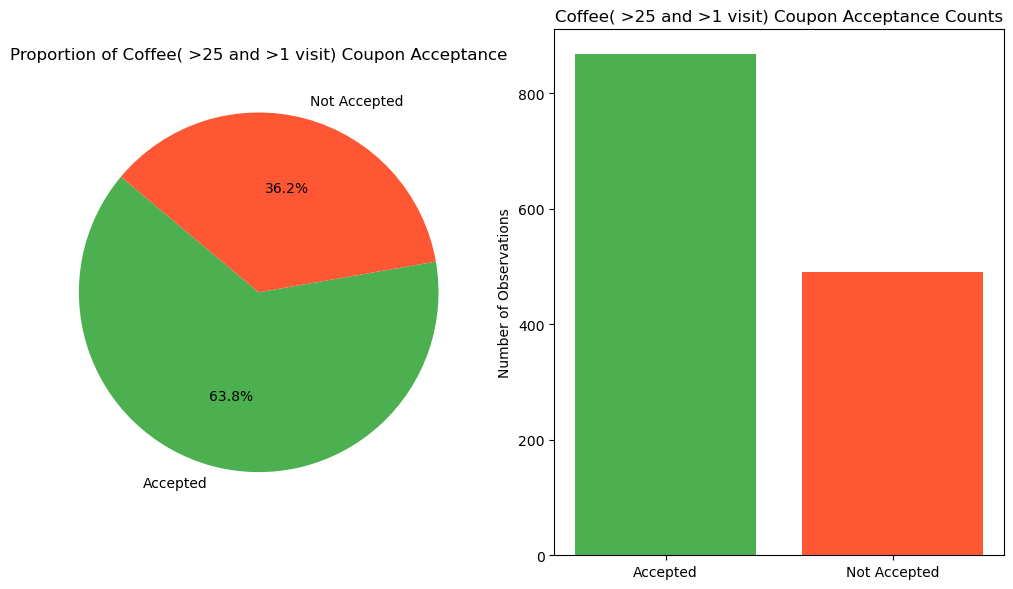

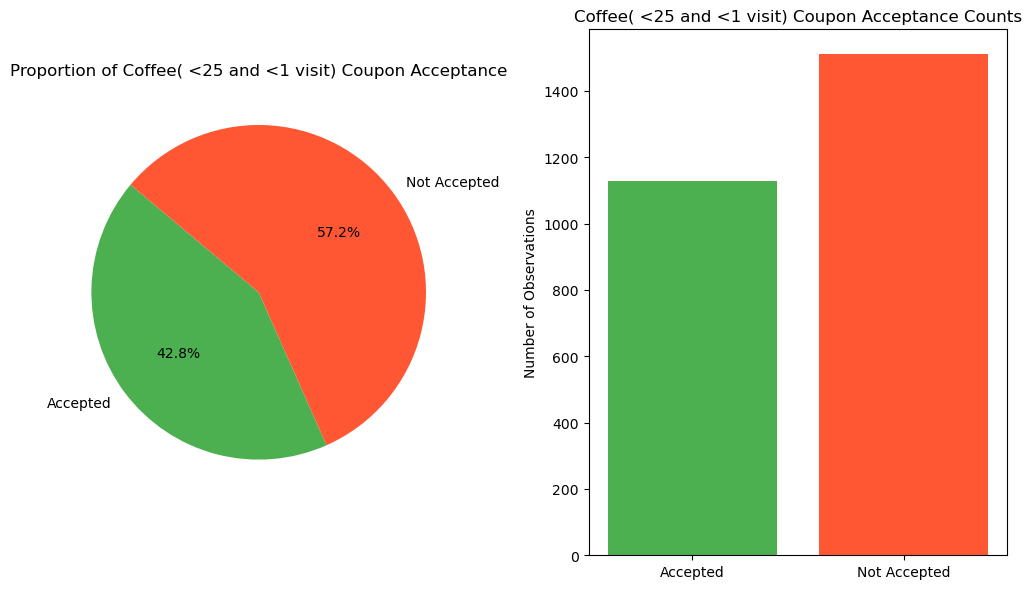

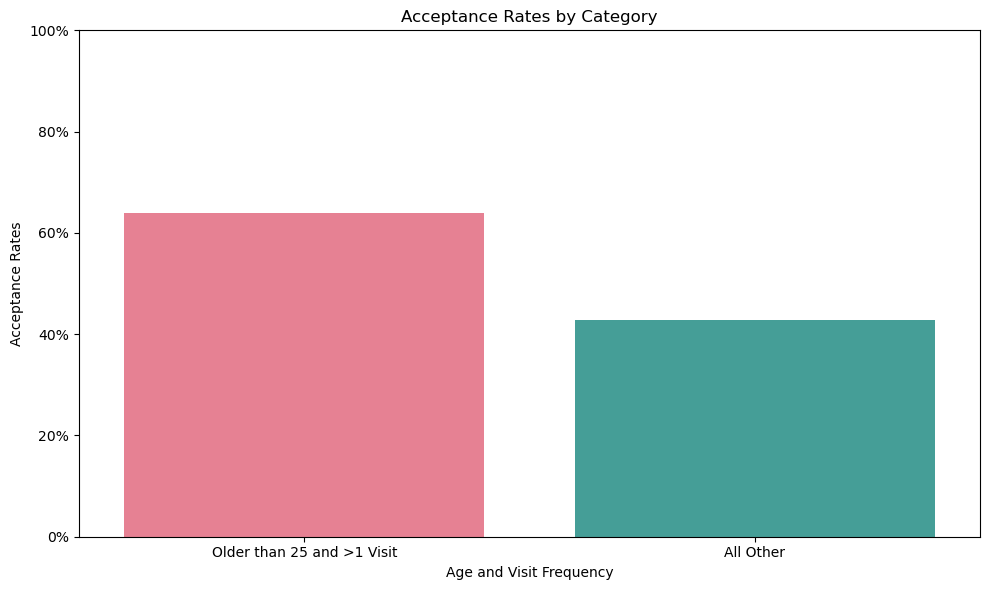

In [19]:

plot_over_25_comparison(coffee_coupon_data, 'Coffee', 'coffee_house')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 

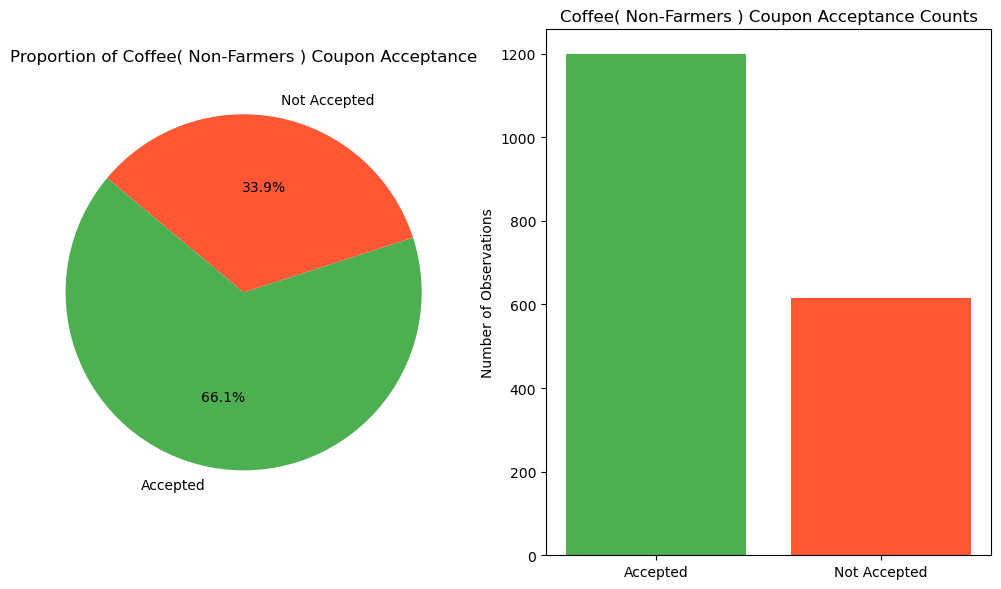

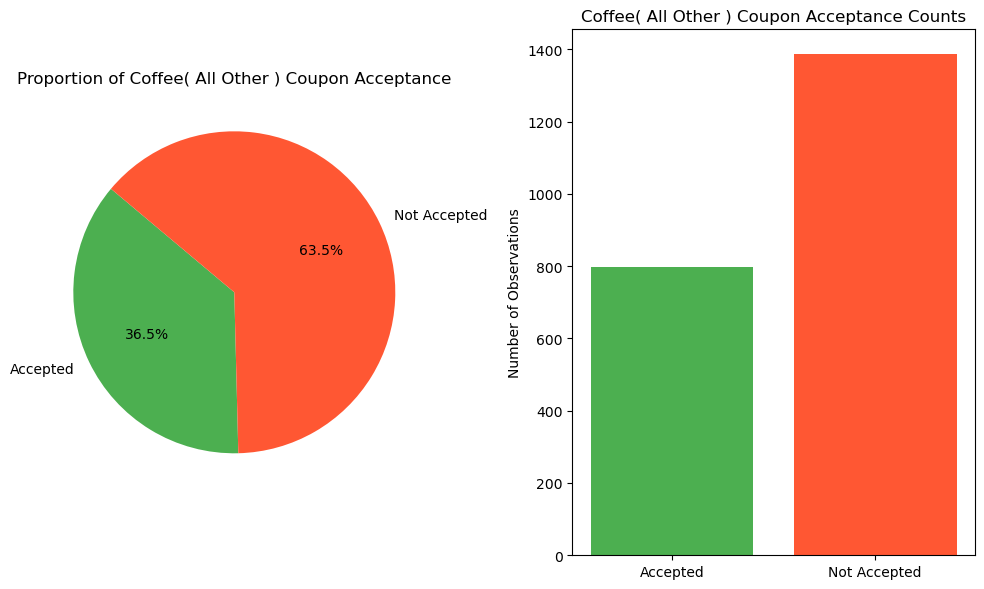

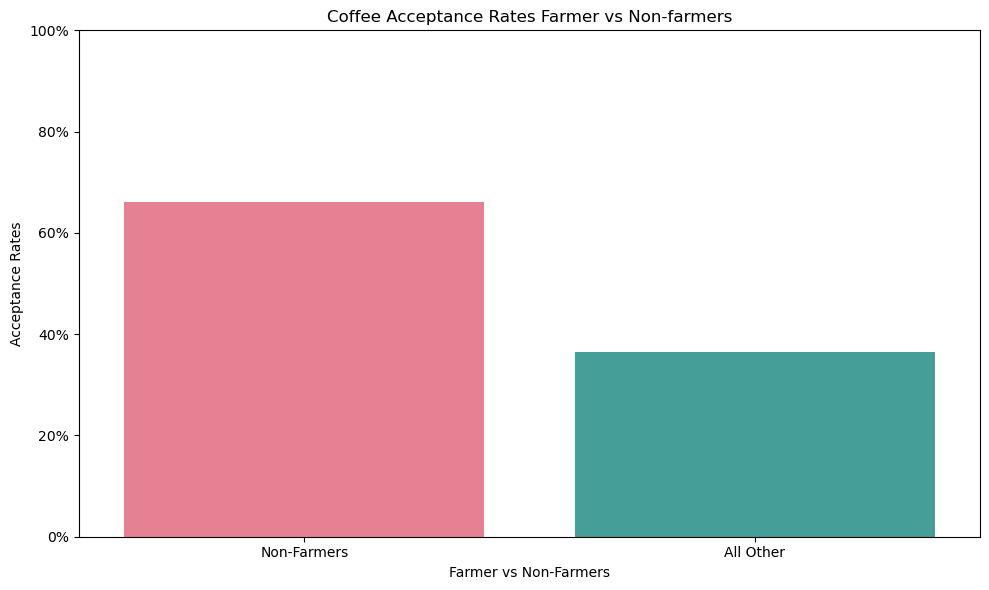

In [20]:
plot_no_kid_or_farmer_comparison(coffee_coupon_data, 'Coffee', 'coffee_house')

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 

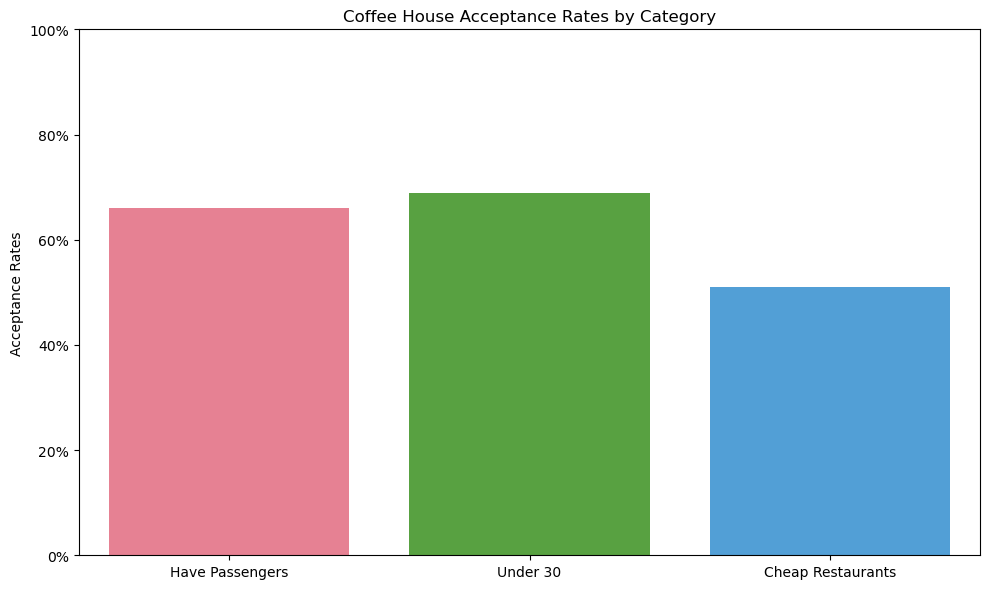

In [21]:

#filter datasets
more_than_once_a_month_values = [ '1~3', 'gt8', '4~8'] 
under_30_values = ['21','below21','26']
occupation = ['Farming Fishing & Forestry']
passenger = ['Kid(s)']
restaurants =['4~8','gt8']
income = ['$25000 - $37499', 'Less than $12500']

have_passengers_query_string = (
    '`coffee_house` in @more_than_once_a_month_values and '
    '`passenger` != "Kid(s)" and '
    '`marital_status` != "Widowed"'
)
have_passengers = coffee_coupon_data.query(have_passengers_query_string)

under_30_query_string = (
    '`coffee_house` in @more_than_once_a_month_values and '
    '`age` in @under_30_values '
)
under_30 = coffee_coupon_data.query(under_30_query_string)

cheap_restaurants_query_string = (
    '`restaurant_less_than_20` in @restaurants and'
    '`income` in @income '  
)
cheap_restaurants = coffee_coupon_data.query(cheap_restaurants_query_string)


plot_comparison(
    ['Have Passengers', 'Under 30', 'Cheap Restaurants'], 
    [have_passengers,under_30, cheap_restaurants],
    'Coffee House Acceptance Rates by Category',
    '',
    'Acceptance Rates',
)

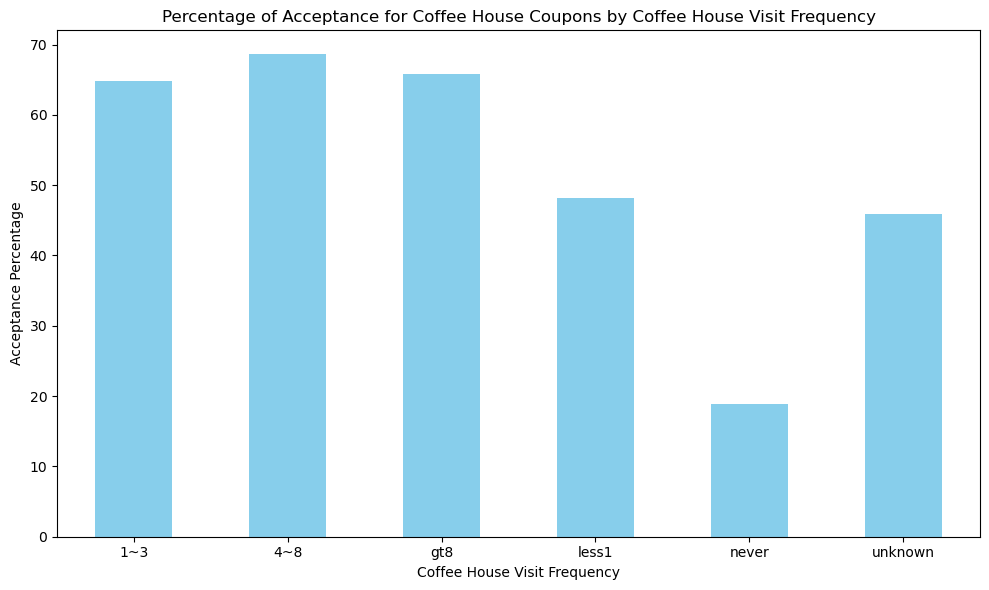

In [22]:
#Plot acceptance by bar visit frequency
acceptance_rates = coffee_coupon_data.groupby('coffee_house')['y'].mean() * 100
title = 'Percentage of Acceptance for Coffee House Coupons by Coffee House Visit Frequency'
plt.figure(figsize=(10, 6))
acceptance_rates.plot(kind='bar', color='skyblue')
plt.title(title)
plt.xlabel('Coffee House Visit Frequency')
plt.ylabel('Acceptance Percentage')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(f'images/{to_snake_case(title)}.png')
plt.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Fequency of visitng a coffee shop seems to have less impact than it die on bar coupons. However, the greatest variance seemed to be with the job they have. Farmers vs Non-farmers. There are likely other traits that should be investigated.